# Matplotlib

## 一、Matplotlib 初相识
matplotlib 的图像是画在 **figure** 上的，一个 figure 上有一个或多个 **axes**，每个 axes 都可以有自己的坐标轴，可以用来绘制各种图形。

### 1.1 Figure 的组成
一个完整的 matplotlib 图像通常会包括四个层级 (container):
* **Figure**: 顶层级，用来容纳所有的绘图元素。
* **Axes**: 绘图区域。
* **Axis**: Axes 的下属层级，用于处理所有与坐标轴、网格相关的元素。
* **Tist**: Axes 的下属层级，用于处理所有与刻度相关的元素。

<img src="images/figure.png">

### 1.2 两种绘图接口

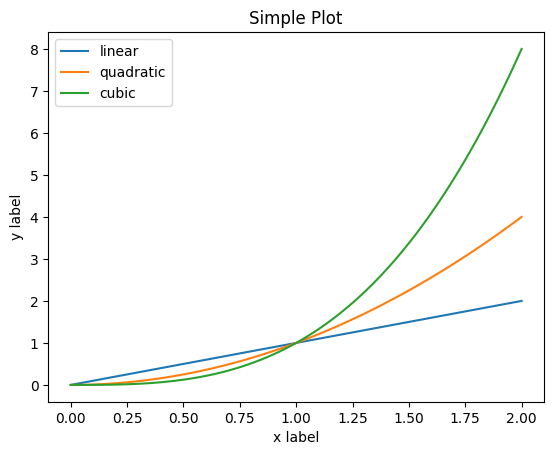

In [1]:
import numpy as np
# object-oriented interface
from matplotlib import pyplot as plt

x = np.linspace(0, 2, 100)
_, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x ** 2, label='quadratic')
ax.plot(x, x ** 3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')
ax.legend()
plt.show()

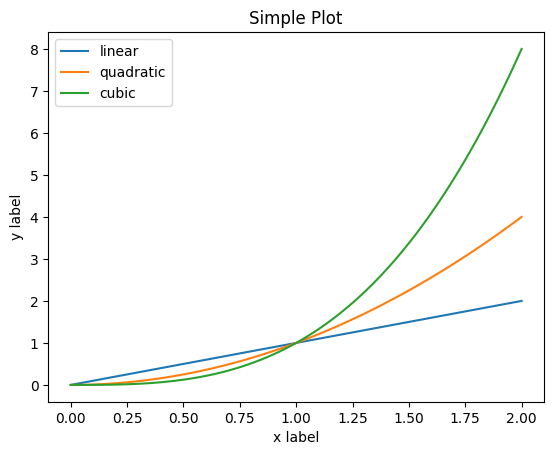

In [2]:
plt.plot(x, x, label='linear')
plt.plot(x, x ** 2, label='quadratic')
plt.plot(x, x ** 3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()
plt.show()

### 1.3 通用模板

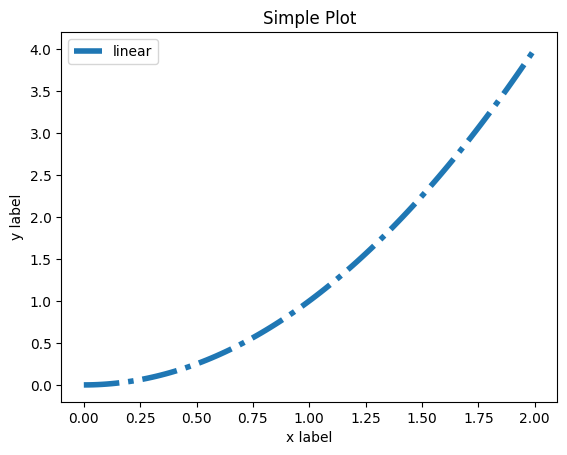

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# 1. 准备数据
x = np.linspace(0, 2, 100)
y = x ** 2
# 2. 设置绘图样式
mpl.rc('lines', linewidth=4, linestyle='-.')
# 3. 定义布局
_, ax = plt.subplots()
# 4. 绘制图像
ax.plot(x, y, label='linear')
# 5. 添加标签、文字和图例
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')
ax.legend();

## 二、艺术画笔见乾坤

### 2.1 Artist
| Axes helper    | Artist             | Container             |
|----------------|--------------------|-----------------------|
| bar - 柱状图      | Rectangle          | ax.patches            |
| errorbar - 误差线 | Line2D & Rectangle | ax.lines & ax.patches |
| fill - 填充      | Polygon            | ax.patches            |
| hist - 直方图     | Rectangle          | ax.patches            |
| imshow - 图像    | AxesImage          | ax.images             |
| plot - 曲线      | Line2D             | ax.lines              |
| scatter - 散点图  | PathCollection     | ax.collections        |

### 2.2 primitives
primitives 包含以下类型：
* Line2D
* Rectangle
* Polygon
* Image

#### 2.2.1 Line2D

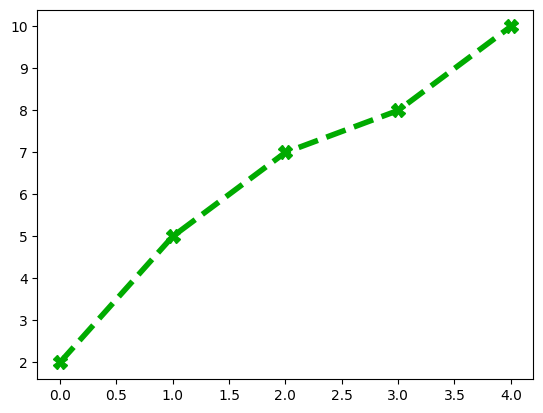

In [4]:
'''
plot() 方法绘制 lines
常用参数：
    xdata, ydata: 坐标数据；xdata 默认为 range(1, len(ydata) + 1)
    linewidth: 线宽
    linestyle: 线型
        '-' 实线
        '--' 虚线
        '-.' 点划线
        ':' 点线
    color: 曲线颜色
        'b' 蓝色
        'g' 绿色
        'r' 红色
        'c' 青色
        'y' 黄色
        'k' 黑色
        'w' 白色
        或者使用 16 进制颜色码指定任意颜色
    marker: 点的标记
        '.' 圆点
        ',' 像素点
        'o' 圆圈
        'v' 倒三角
        '^' 正三角
        '<' 左三角
        '>' 右三角
        '1' 向下三角星
        '2' 向上三角星
        '3' 向左三角星
        '4' 向右三角星
        '8' 八边形
        's' 正方形
        'p' 五边形
        '*' 五角星
        'h' 六边形
        'H' 六边形（横向）
        'D' 菱形（宽）
        'd' 菱形（窄）
        '+' 加号（细）
        'P' 加号（粗）
        'x' 乘号（细）
        'X' 乘号（粗）
        '|' 竖线
        '_' 水平线
    markersize: 标记的大小
'''
import matplotlib.pyplot as plt

x = range(0, 5)
y = [2, 5, 7, 8, 10]
plt.plot(x, y, marker='X', linestyle='--', color='#00ab00', markersize=10)
plt.show()

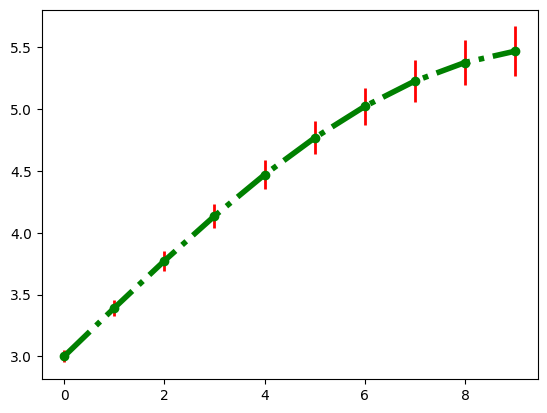

In [5]:
'''
errorbar() 方法绘制误差折线图
常用参数：
    x, y: 坐标数据
    yerr, xerr: 误差数据
    fmt: 误差线的格式
        例如：
        'b' 蓝色标记
        'or' 红色圆圈
        '-g' 绿色实线
        '^k' 黑色正三角
    ecolor: 误差线颜色
    elinewidth: 误差线宽度
'''
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, fmt='o-.g', ecolor='r', elinewidth=2);

#### 2.2.2 patches

##### 2.2.2.1 Rectangle

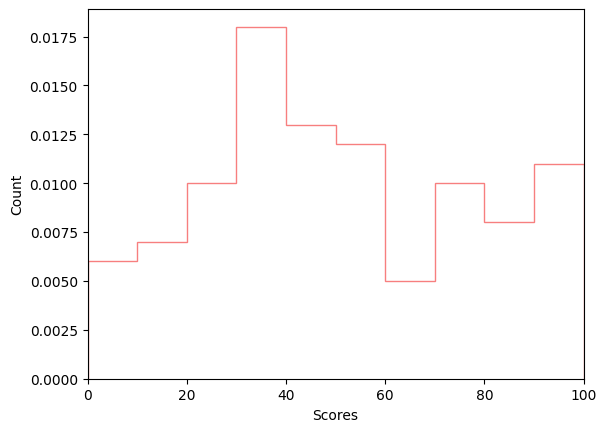

In [6]:
'''
hist() 方法绘制直方图
常用参数：
    bins: 直方图的区间分布
    range: tuple, 直方图的区间范围，在没有给出 bins 时有效
    density: bool = False, 是否显示概率密度（区间数目 / (总数 * 区间宽度)）
    histtype: str = 'bar', 直方图的类型
        'bar' 柱状图
        'barstacked' 堆叠柱状图
        'step' 阶梯状图
        'stepfilled' 阶梯状图（填充），效果与 bar 类似
    align: str = 'mid', 直方图的对齐方式
        'left' 左对齐
        'right' 右对齐
        'mid' 居中对齐
    log: bool = False, y 轴数据是否选择指数刻度
    stacked: bool = False, 是否为堆积状图
'''
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(0, 100, 100)
bins = np.arange(0, 101, 10)
plt.hist(x, bins=bins, color='#F00000', alpha=0.5, density=True, histtype='step')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.xlim(0, 100)  # 设置 x 轴范围
plt.show()

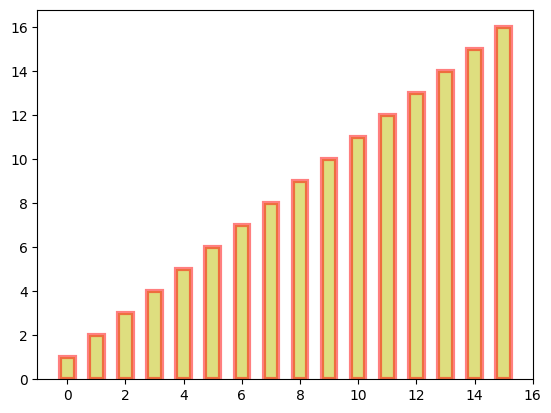

In [7]:
'''
bar() 方法绘制柱状图
常用参数：
    left: x 轴位置序列
    height: y 轴高度序列
    width: 柱状图的宽度，一般 0.8 即可
    color: 柱状图的颜色
    edgecolor: 柱状图边框颜色
    label: 解释每个图像代表的含义（为 legend 准备）
'''
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(16)
y = range(1, 17)
plt.bar(x, y, width=0.5, color='y', alpha=0.5, edgecolor='r', label="The First Bar", lw=3);

##### 2.2.2.2 Polygon

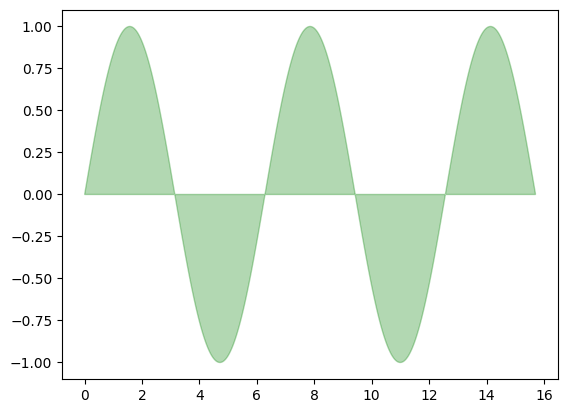

In [8]:
'''
fill() 方法绘制填充图形
常用参数：
    x, y: 坐标数据
    color: 填充颜色
    alpha: 透明度
'''

x = np.linspace(0, 5 * np.pi, 1000)
y = np.sin(x)
plt.fill(x, y, color='g', alpha=0.3);

##### 2.2.2.3 Wedge

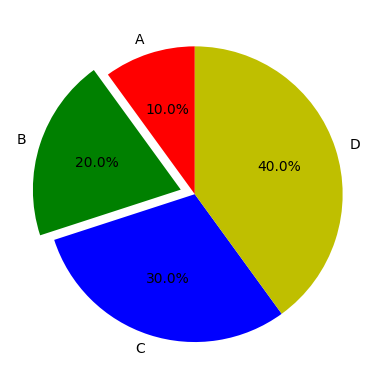

In [9]:
'''
pie() 方法绘制饼图
常用参数：
    x: 一维数组，表示楔形大小，按 x / sum(x) 计算比例
    explode: 数组，表示突出显示的部分
    labels: 数组，表示每个部分的标签
    colors: 数组，表示每个部分的颜色
    startangle: 起始角度
    autopct: 格式字符串，饼图中每部分的百分比显示格式
'''
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D']
sizes = [10, 20, 30, 40]
explode = [0, 0.1, 0, 0]
colors = ['r', 'g', 'b', 'y']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%');

#### 2.2.3 Collections

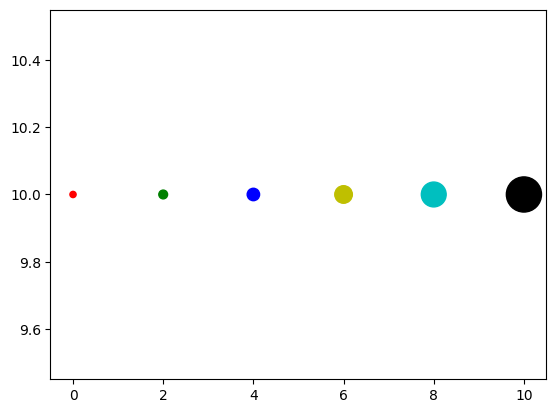

In [10]:
'''
scatter() 方法绘制散点图
常用参数：
    x, y: 坐标数据
    s: 散点大小
    c: 散点颜色
    marker: 散点形状
'''
import matplotlib.pyplot as plt

x = range(0, 11, 2)
y = [10] * len(x)
s = [20 * 2 ** n for n in range(len(x))]
c = ['r', 'g', 'b', 'y', 'c', 'k']
plt.scatter(x, y, s=s, c=c, marker='o');

#### 2.2.4 Images

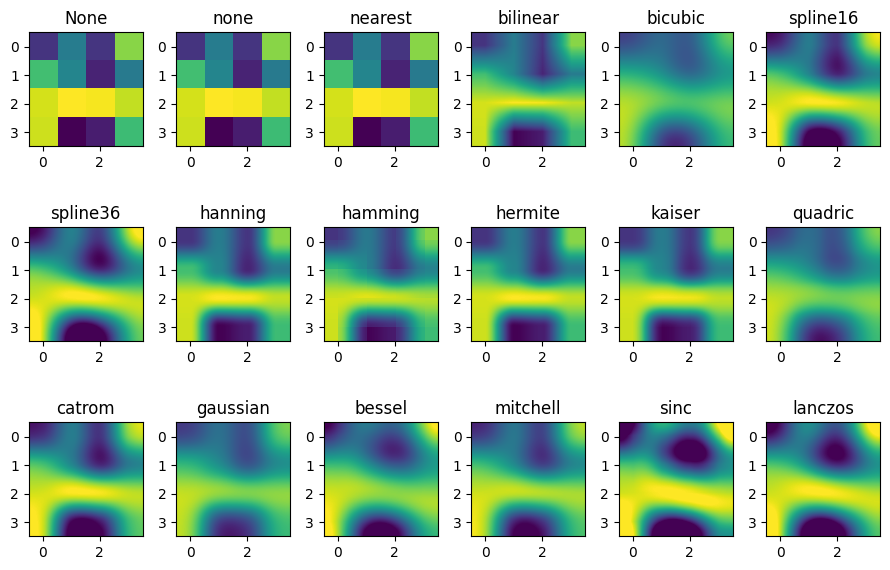

In [11]:
'''
imshow() 方法绘制图像
常用参数：
    X: 图像数据
    cmap: 颜色映射
    norm: 颜色映射的范围
    interpolation: 插值方式
'''
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
grid = np.random.rand(4, 4)
_, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6))
for ax, method in zip(axs.flat, methods):
    ax.imshow(grid, cmap='viridis', interpolation=method)
    ax.set_title(str(method))
plt.tight_layout();

### 2.3 Object Container

#### 2.3.1 Figure

Axes(0.125,0.53;0.775x0.35)
[<Axes: >, <Axes: >]


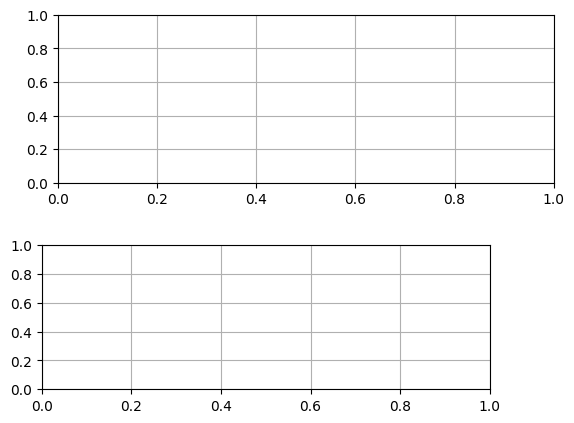

In [12]:
'''
Figure 容器的常见属性：
    Figure.patch: 背景矩形
    Figure.axes: Axes 列表(包括 subplot)
    Figure.images: FigureImages.patch 列表
    Figure.lines: Line2D 列表(很少用)
    Figure.legends: Figure Legend 列表
    Figure.texts: Figure Text 列表
'''
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)  # 2 行 1 列的图，选择第 1 张子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])  # [left, bottom, width, height]
# 添加网格线
for ax in fig.axes:
    ax.grid(True)
print(ax1)
print(fig.axes)

#### 2.3.2 Axes

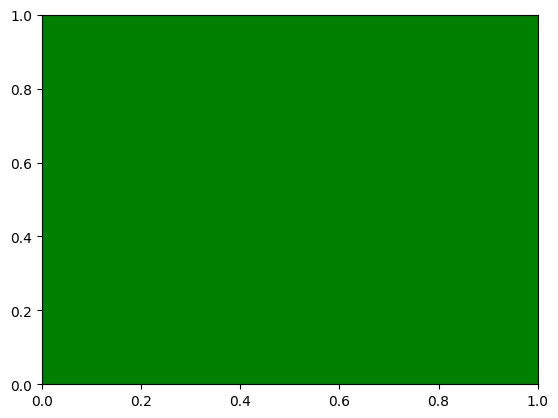

In [13]:
'''
Axes 容器的常见属性：
    artists: Artist 实例列表
    patch: Axes 所在的矩形
    collections: Collection 实例列表
    images: Axes 图像
    legends: Legend 实例列表
    lines: Line2D 实例列表
    patches: Patch 实例列表
    texts: Text 实例列表
    xaxis: matplotlib.axis.XAxis 实例
    yaxis: matplotlib.axis.YAxis 实例
'''
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('g')

#### 2.3.3 Axis

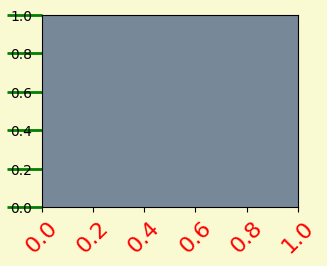

In [14]:
'''
Axis 容器的常见方法：
    get_ticklocs(): 获取坐标轴刻度位置
    get_ticklabels(): 获取坐标轴刻度标签列表
    get_ticklines(): 获取坐标轴刻度线列表
    get_data_interval(): 获取坐标轴刻度间隔
    get_view_interval(): 获取坐标轴视角间隔
'''
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set_facecolor('#fafad2')  # 设置画布背景颜色
ax = fig.add_axes([0.1, 0.3, 0.4, 0.4])
ax.patch.set_facecolor('#778899')  # 设置 Axes 背景颜色

for label in ax.xaxis.get_ticklabels():  # 获取 x 轴刻度标签实例
    label.set_color('r')  # 设置标签颜色
    label.set_rotation(45)  # 设置标签旋转角度
    label.set_fontsize(16)  # 设置标签字体大小

for line in ax.yaxis.get_ticklines():  # 获取 y 轴刻度线条实例
    line.set_markeredgecolor('g')  # 设置刻度线条颜色
    line.set_markersize(25)  # 设置刻度线条 marker 大小
    line.set_markeredgewidth(2)  # 设置刻度线条宽度

#### 2.3.4 Tist

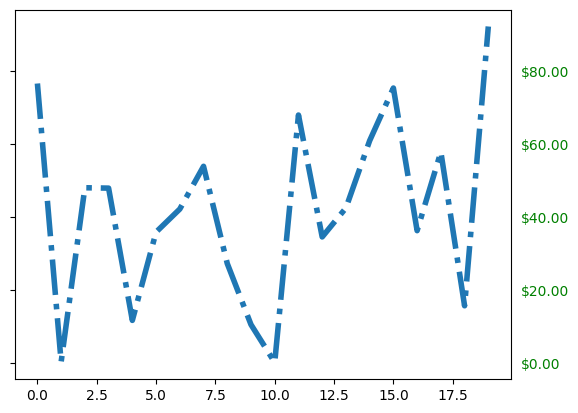

In [15]:
'''
Tick 常见属性：
    tick1line: Line2D 实例，刻度线 1(y 左 x 下)
    tick2line: Line2D 实例，刻度线 2(y 右 x 上)
    gridline: Line2D 实例，网格线
    label1: Text 实例，刻度标签 1
    label2: Text 实例，刻度标签 2
'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

_, ax = plt.subplots()
ax.plot(100 * np.random.rand(20))
# 设置 ticker 的显示格式
formatter = mpl.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
# 设置 ticker 参数：右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='g', labelleft=False, labelright=True);

## 三、布局格式定方圆

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

### 3.1 子图

#### 3.1.1 绘制均匀状态下的子图

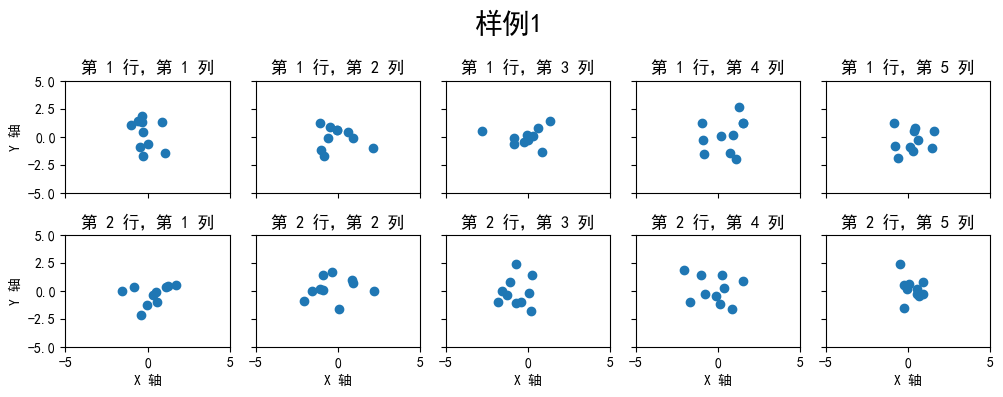

In [17]:
'''
subplots(nrows=1, ncols=1, figsize, sharex, sharey) -> 画布和子图构成的列表
    nrows: 行数
    ncols: 列数
    figsize: 画布尺寸
    sharex, sharey: 是否共享 x 轴和 y 轴刻度
    tight_layout: 是否自动调整子图间距
'''
import numpy as np

fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title(f'第 {i + 1} 行，第 {j + 1} 列')
        axs[i][j].set_xlim(-5, 5)
        axs[i][j].set_ylim(-5, 5)
        if i == 1:
            axs[i][j].set_xlabel('X 轴')
        if j == 0:
            axs[i][j].set_ylabel('Y 轴')
fig.tight_layout()
plt.show()

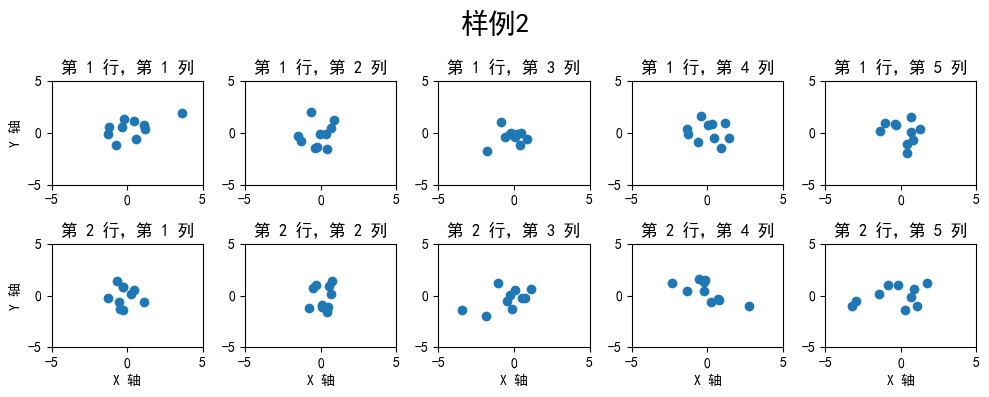

In [18]:
# pyplot 模式
rows, cols = 2, 5
plt.figure(figsize=(10, 4))
plt.suptitle('样例2', size=20)
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        plt.scatter(np.random.randn(10), np.random.randn(10))
        plt.title(f'第 {i + 1} 行，第 {j + 1} 列')
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        if i == 1:
            plt.xlabel('X 轴')
        if j == 0:
            plt.ylabel('Y 轴')
plt.tight_layout()
plt.show()

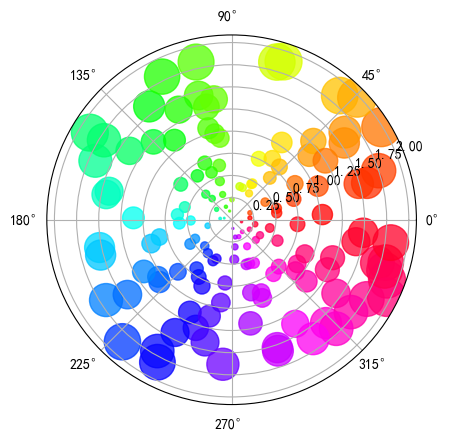

In [19]:
# 创建极坐标系下的图表
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r ** 2
colors = theta

plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, alpha=0.75, cmap='hsv');

#### 3.1.2 绘制不均匀状态下的子图

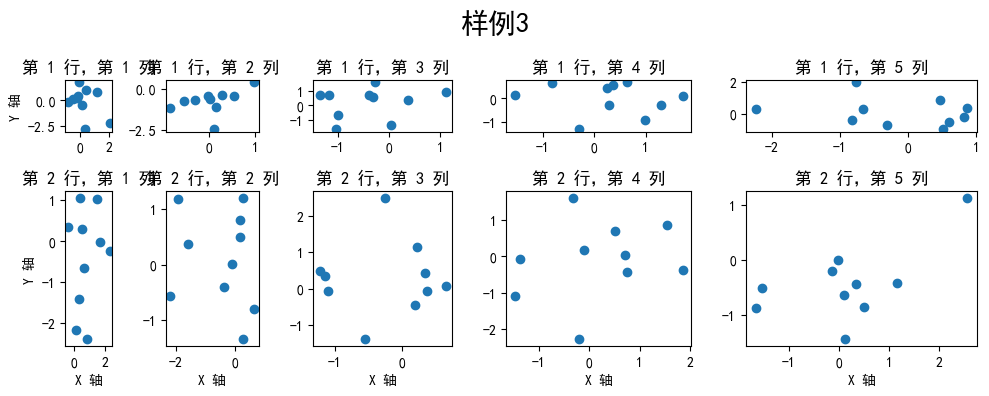

In [20]:
'''
add_gridspec(nrows=1, ncols=1, height_ratios=None, width_ratios=None) -> GridSpec
    width_ratios: 列宽比例
    height_ratios: 行高比例
'''
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(2, 5, width_ratios=[1, 2, 3, 4, 5], height_ratios=[1, 3])
fig.suptitle('样例3', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title(f'第 {i + 1} 行，第 {j + 1} 列')
        if i == 1:
            ax.set_xlabel('X 轴')
        if j == 0:
            ax.set_ylabel('Y 轴')
fig.tight_layout()
plt.show()

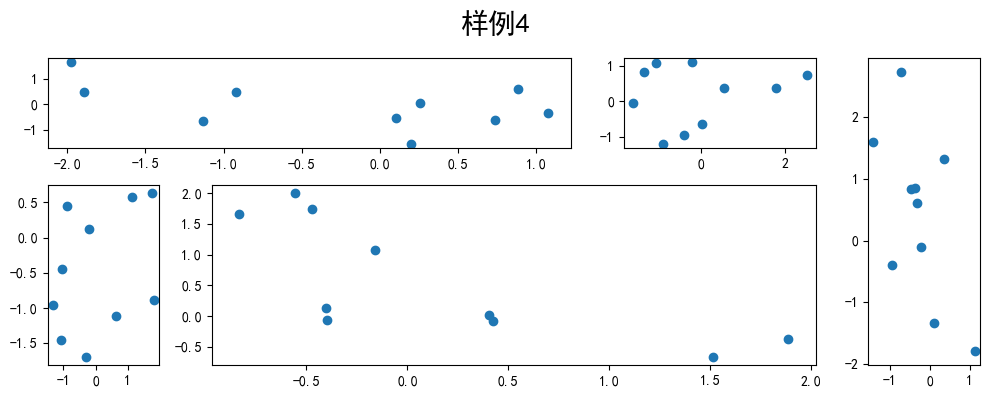

In [21]:
# 利用切片实现跨列和跨行
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(2, 6, width_ratios=[2, 2.5, 3, 1, 1.5, 2], height_ratios=[1, 2])
fig.suptitle('样例4', size=20)
# sub1
ax1 = fig.add_subplot(spec[0, :3])
ax1.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax2 = fig.add_subplot(spec[0, 3:5])
ax2.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax3 = fig.add_subplot(spec[:, 5])
ax3.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax4 = fig.add_subplot(spec[1, 0])
ax4.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax5 = fig.add_subplot(spec[1, 1:5])
ax5.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()
plt.show()

### 3.2 子图上的一些方法

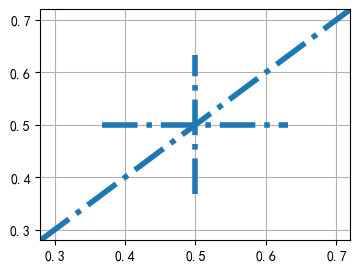

In [22]:
# 画直线
_, ax = plt.subplots(figsize=(4, 3))
ax.axhline(0.5, 0.2, 0.8)  # 画水平线 y=0.5，从 0.2 到 0.8(比例)
ax.axvline(0.5, 0.2, 0.8)  # 画垂直线 x=0.5，从 0.2 到 0.8(比例)
ax.axline([0.3, 0.3], [0.7, 0.7])  # 画一条线段 点 [0.3, 0.3] -> 点 [0.7, 0.7]
# 添加网格
ax.grid(True);

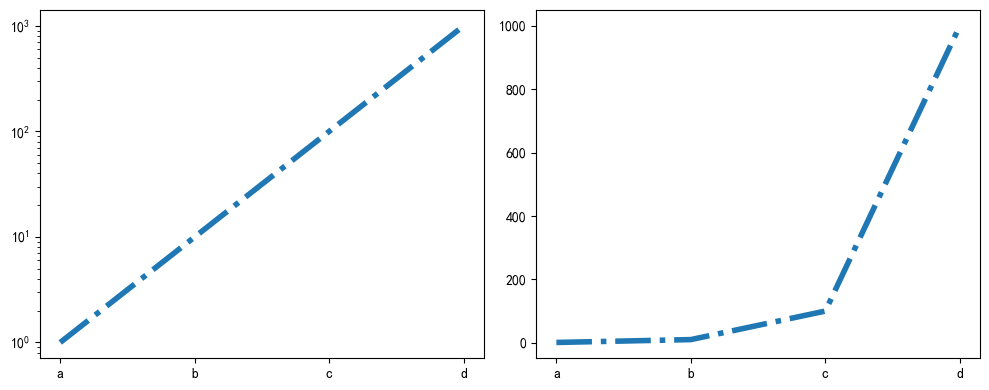

In [23]:
# 设置坐标轴的规度
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    axs[i].plot(list('abcd'), [10 ** n for n in range(4)])
axs[0].set_yscale('log')
fig.tight_layout()

## 四、文字图例尽眉目

### 4.1 Figure 和 Axes 上的文本

#### 文本 API
| pyplot API | OO API     | 描述                      |
|------------|------------|-------------------------|
| text       | text       | 在子图 axes 的任意位置添加文本      |
| annotate   | annotate   | 在子图 axes 的特定位置添加注释，包括箭头 |
| xlabel     | set_xlabel | 为子图 axes 添加 x 轴标签       |
| ylabel     | set_ylabel | 为子图 axes 添加 y 轴标签       |
| title      | set_title  | 为子图 axes 添加标题           |
| figtext    | text       | 在画布 figure 的任意位置添加文本    |
| suptitle   | suptitle   | 为画布 figure 添加标题         |

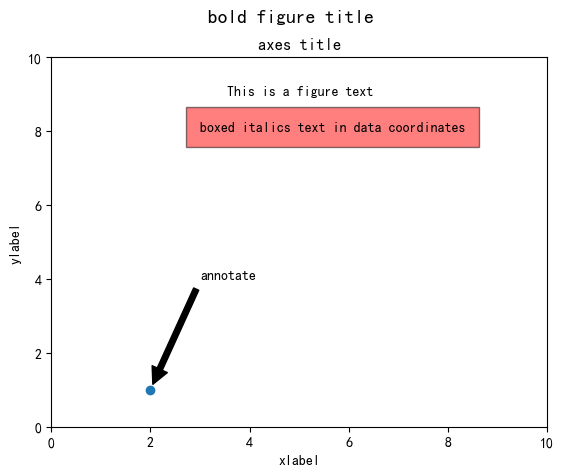

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

# 标题
fig.suptitle("bold figure title", fontsize=14, fontweight="bold")
ax.set_title("axes title")
# 标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
# x, y 轴范围
ax.axis([0, 10, 0, 10])
# 文本
fig.text(0.4, 0.8, "This is a figure text")
ax.text(3, 8, "boxed italics text in data coordinates", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.plot([2], [1], 'o')
# 注释
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), arrowprops=dict(facecolor='k', shrink=0.05));

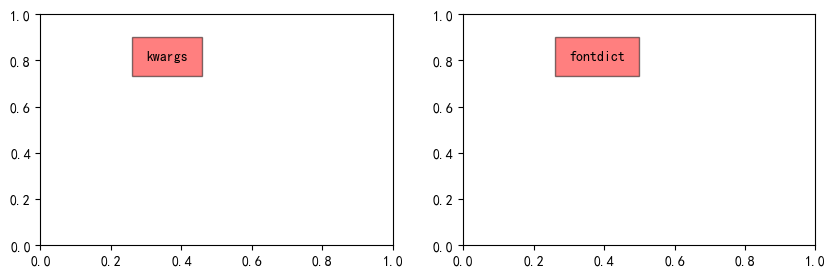

In [25]:
'''
Axes.text(x, y, s, fontdict=None, **kwargs)
    x, y: 文本开始位置(当前坐标系下的坐标)
    s: 文本内容
    fontdict: 字体属性字典，用于覆盖默认的文本属性
    kwargs: 文本样式参数
        常用参数：
            alpha: float | None, 透明度
            backgroundcolor: color, 背景色
            color: color, 文本颜色
            fontfamily | family: str, 字体(常用{'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'})
            fontsize | size: float | str{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, 字体大小
            fontstyle | style: {'normal', 'italic', 'oblique'}, 字体风格
            fontweight | weight: 0 ~ 1000 | {'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 
                                            'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}, 字体粗细
            horizontalalignment | ha: {'center', 'right', 'left'}, 水平对齐方式
            verticalalignment | va: {'center', 'top', 'bottom', 'baseline'}, 垂直对齐方式
            linespacing: float, 行间距
            rotation: float, 逆时针旋转角度
注：fontdict 和 kwargs 产生的效果相同
'''
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
# 方式一：**kwargs
axes[0].text(0.3, 0.8, 'kwargs', style='italic',
             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# 方式二：fontdict
axes[1].text(0.3, 0.8, 'fontdict',
             fontdict={'style': 'italic', 'bbox': {'facecolor': 'red', 'alpha': 0.5, 'pad': 10}});

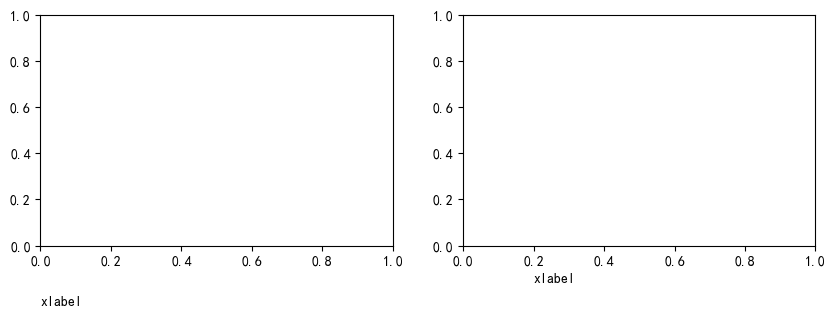

In [26]:
'''
Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, loc=None, **kwargs)
    xlabel: x 轴标签内容
    labelpad: 标签与轴线之间的距离, 默认为 4
    loc: 标签位置 {’left‘, 'center', 'right'}，默认为 'center'
'''
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
axes[0].set_xlabel('xlabel', labelpad=20, loc='left')
axes[1].set_xlabel('xlabel', position=(0.2, _), ha='left');

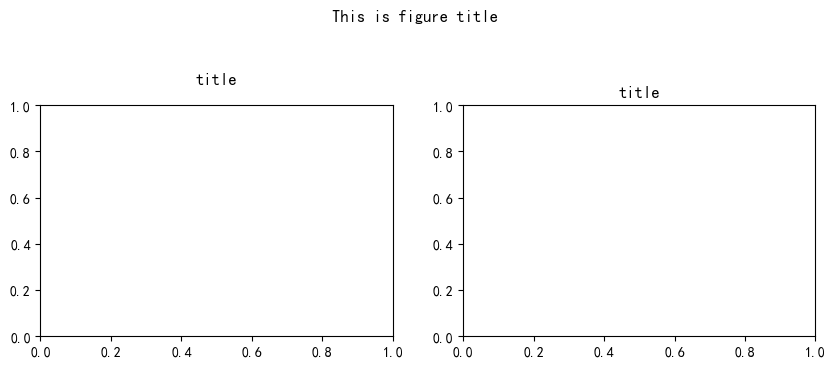

In [27]:
'''
Axes.set_title(label, fontdict=None, loc=None, pad=None, y=None, **kwargs)
    label: 子图标签的内容
    pad: 标题偏离图标顶部的距离，默认为 6
    y: title 相对于子图的位置，默认为 1，即子图的顶部
'''
fig = plt.figure(figsize=(10, 3))
fig.suptitle("This is figure title", y=1.2)  # 通过参数 y 设置高度
axes = fig.subplots(1, 2)
axes[0].set_title('title', pad=15)
axes[1].set_title('title', pad=6);

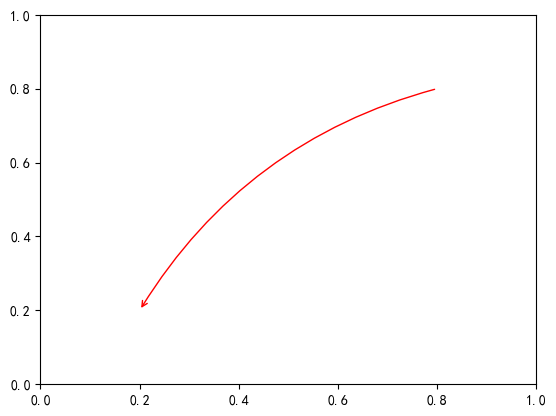

In [28]:
'''
Axes.annotate(text, xy, *args, **kwargs)
    text: 注释内容
    xy: 注释箭头指向的坐标
    xytext: 注解文本的坐标
    xycoords: 定义 xy 坐标系
    textcoords: 定义 xytext 坐标系
        coordinate systems:
            'figure points': 从画布左下角的点开始
            'figure pixels': 从画布左下角的像素开始
            'figure fraction': 从画布左下角的比例开始
            'subfigure points': 从子图左下角的点开始
            'subfigure pixels': 从子图左下角的像素开始
            'subfigure fraction': 从子图左下角的比例开始
            'axes points': 从坐标轴左下角的点开始
            'axes pixels': 从坐标轴左下角的像素开始
            'axes fraction': 从坐标轴左下角的比例开始
            'data': 坐标系原点(default)
            'polar': 极坐标系原点
    arrowprops: 箭头属性字典
        arrowstyle: 箭头样式
            '->'    '-['    '-|>'   '-'    '|-|'    '<-'     '<|-'    '<->'   '<|-|>' (样如其形)
        connectionstyle: 连接线样式
            angle
            angle3
            arc
            arc3
            bar
    annotation_clip: bool | None, 是否裁剪注释超出子图范围
'''
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="r")
            );

**connectionstyle 样例**

<img src="images/connectionstyle.png">

In [29]:
# 全局字体更改
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

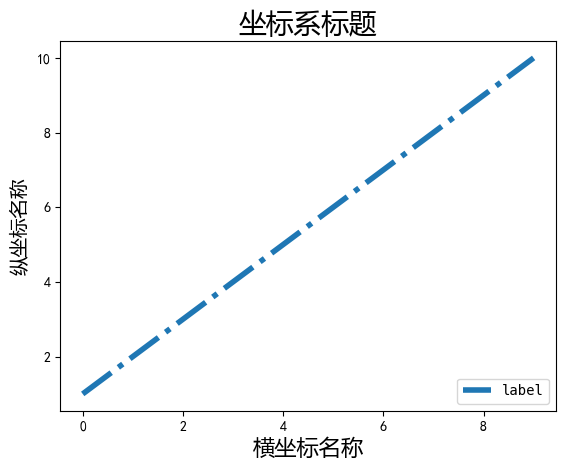

In [33]:
# 局部字体更改
x = [i for i in range(1, 11)]
plt.plot(x, label="label")
plt.xlabel("横坐标名称", fontproperties="Microsoft YaHei", fontsize=16)
plt.ylabel("纵坐标名称", fontproperties="Microsoft YaHei", fontsize=14)
plt.title("坐标系标题", fontproperties="Microsoft YaHei", fontsize=20)
plt.legend(loc="lower right", prop={"family": "monospace"}, fontsize=10);

### 4.2 Tick 上的文本


#### 4.2.1 简单模式

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

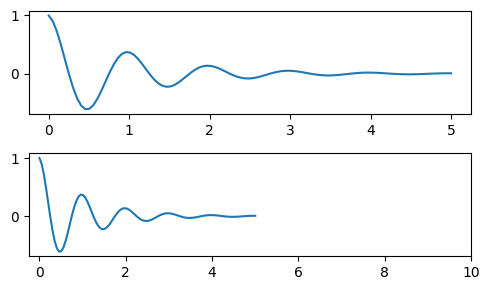

In [2]:
# axis.set_ticks
_, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.));

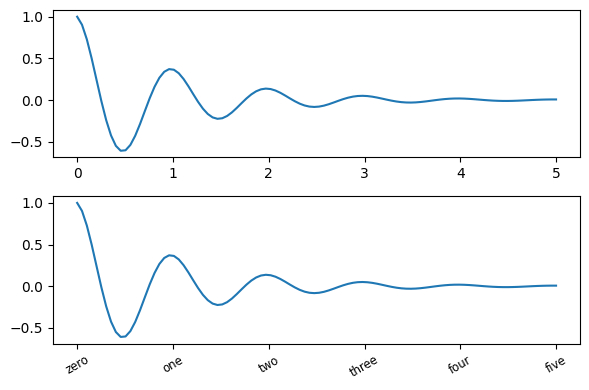

In [3]:
# 
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].set_xticks([0, 1, 2, 3, 4, 5])
axs[1].set_xticklabels(['zero', 'one', 'two', 'three', 'four', 'five'], rotation=30, fontsize="small")
axs[1].xaxis.set_ticks_position('bottom');

#### 4.2.2 Tick Locator and Formatter

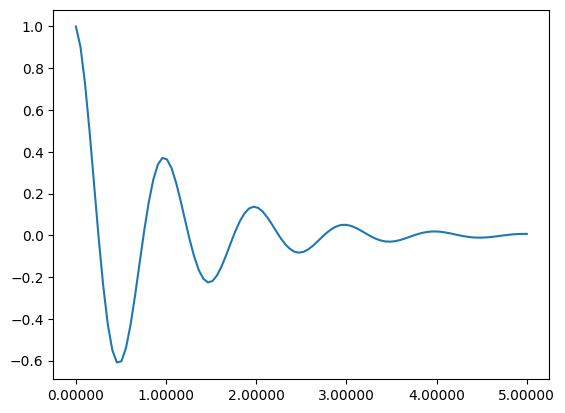

In [5]:
'''
Tick Formatters: set_major_formatter & set_minor_formatter 可以通过接收字符串格式或函数参数来设置刻度值的格式
'''
# 接受字符串
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x1, y1)
formatter = mpl.ticker.FormatStrFormatter('%1.5f')
ax.xaxis.set_major_formatter(formatter);

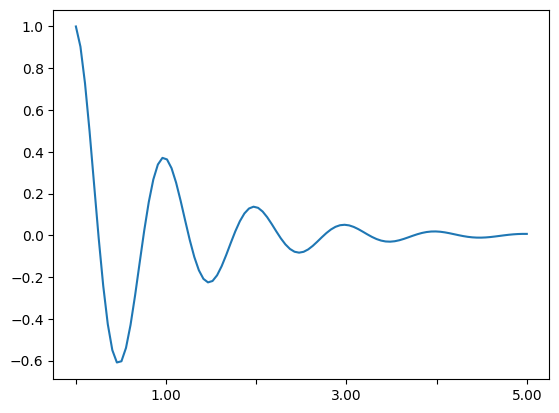

In [8]:
# 接受函数参数
def format_odd_ticks(x, pos):
    if x % 2:
        return f'{x:.2f}'
    return ''


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(format_odd_ticks);

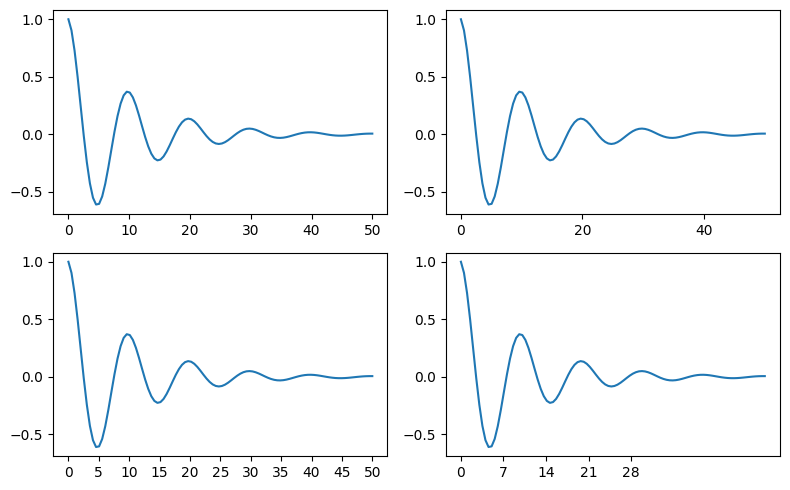

In [9]:
'''
Tick Locators
    当需要更改刻度的位置时，matplotlib给了常用的几种locator的类型。
    如果要绘制更复杂的图，可以先设置locator的类型，然后通过axs.xaxis.set_major_locator(locator)绘制即可。
    plt.MaxNLocator(nbins=7): 自动选择合适的位置，并且刻度之间最多不超过 nbins 个间隔
    plt.FixedLocator(locs): 直接指定刻度所在的位置
    plt.IndexLocator(base=1, offset=0.5): 间隔为 base 的刻度，从 offset 开始
    plt.LinearLocator(numticks=5): 等距的刻度
'''
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for ax in axs.flat:
    ax.plot(x1 * 10., y1)

axs[0, 0].xaxis.set_major_locator(mpl.ticker.AutoLocator())
axs[0, 1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=3))
axs[1, 0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
axs[1, 1].xaxis.set_major_locator(mpl.ticker.FixedLocator([0, 7, 14, 21, 28]));

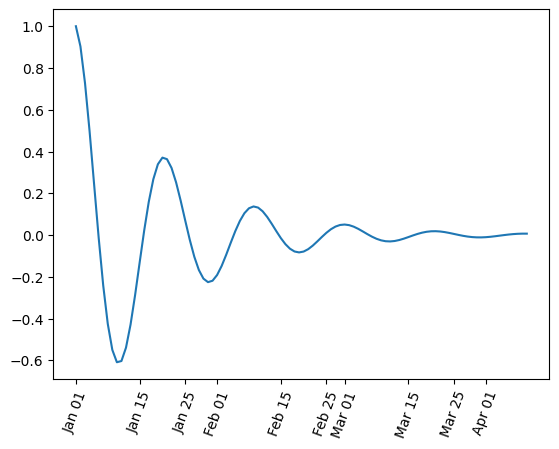

In [11]:
import datetime

# mpl.dates 模块还提供了特殊的设置日期型刻度格式和位置的方式
locator = mpl.dates.DayLocator(bymonthday=[1, 15, 25])
formatter = mpl.dates.DateFormatter('%b %d')

fig = plt.figure()
ax = fig.add_subplot()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);

### 4.3 Legend

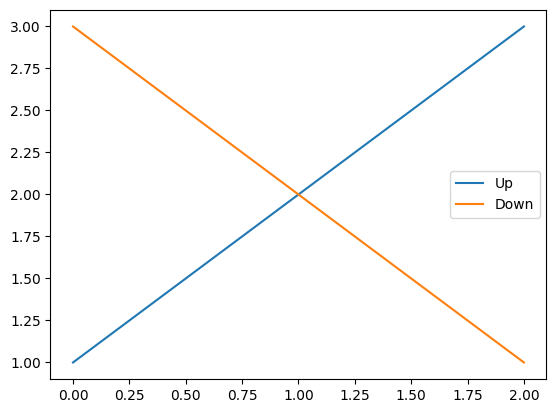

In [12]:
'''
legend entry: 图例条目
legend key: 图例键
legend label: 图例标签
legend handle: 图例句柄
'''
import matplotlib.pyplot as plt

_, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label="Line 2")
line_down, = ax.plot([3, 2, 1], label="Line 1")
ax.legend(handles=[line_up, line_down], labels=["Up", "Down"]);

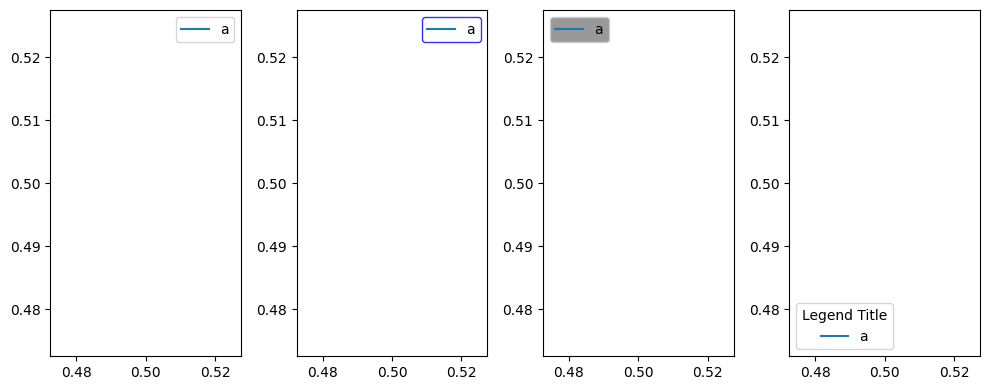

In [17]:
'''
legend() 的 loc 参数：
    'best' - 0
    'upper right' - 1
    'upper left' - 2
    'lower left' - 3
    'lower right' - 4
    'right' - 5
    'center left' - 6
    'center right' - 7
    'lower center' - 8
    'upper center' - 9
    'center' - 10
'''
fig, axs = plt.subplots(1, 4, figsize=(10, 4))
for i in range(4):
    axs[i].plot([0.5], [0.5])
axs[0].legend(labels='a', loc=0)
# 图例边框
axs[1].legend(labels='a', loc=1, edgecolor='b')
# 背景颜色
axs[2].legend(labels='a', loc=2, facecolor='gray')
# 图例标题
axs[3].legend(labels='a', loc=3, title='Legend Title')
fig.tight_layout();

## 五、样式色彩秀芳华

### 5.1 绘图样式(style)

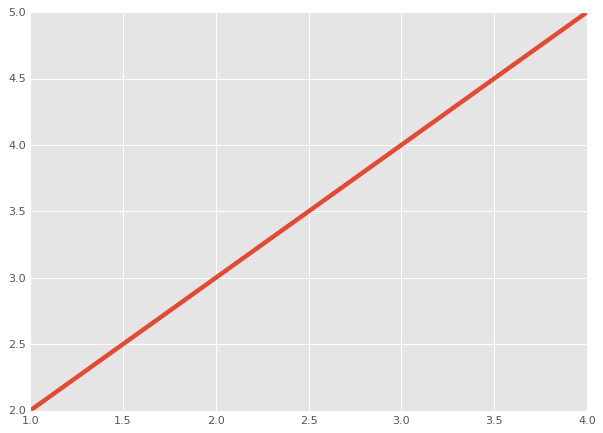

In [21]:
'''
plt.style.use(style) 预先定义样式
style 可选字段有：
    'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 
    'fivethirtyeight', 'ggplot', 'grayscale' 'tableau-colorblind10'
    
    
'''
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot([1, 2, 3, 4], [2, 3, 4, 5])
plt.show()


Bad key lines.linwidth in file ./style/test.mplstyle, line 3 ('lines.linwidth: 3')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


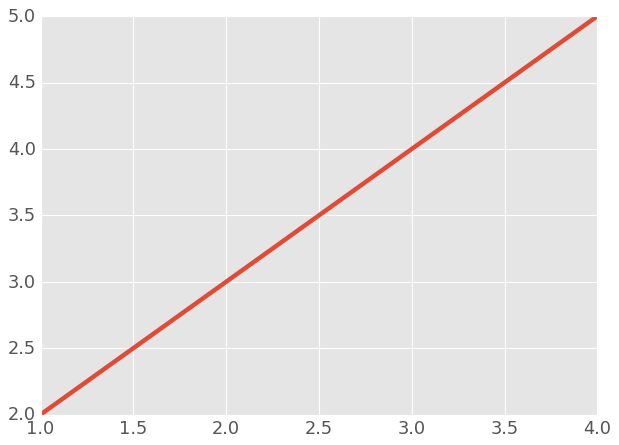

In [22]:
# 自定义样式
plt.style.use("./style/test.mplstyle")
plt.plot([1, 2, 3, 4], [2, 3, 4, 5])
plt.show()

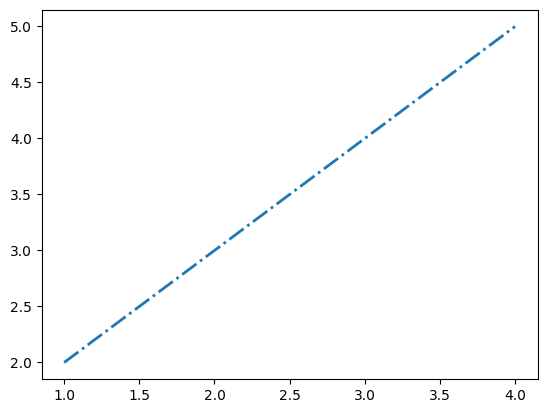

In [24]:
# 通过 rcparams 设置全局样式
# 先恢复默认样式
import matplotlib as mpl

plt.style.use("default")
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.linestyle'] = '--'
mpl.rc('lines', linewidth=2, linestyle='-.')
plt.plot([1, 2, 3, 4], [2, 3, 4, 5])
plt.show()

### 5.2 颜色(color)

<img src="images/colors.png">

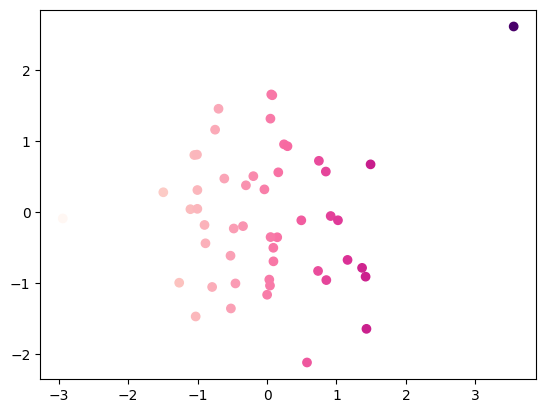

In [29]:
'''
color 的五种表述形式：
    内置颜色名称：'b', 'g', 'r', 'c','m', 'y', 'k', 'w'
    HEX RGB：'#ffffff'   HEX RGBA：'#ffffff00'
    RGB：(R, G, B)    RGBA：(R, G, B, A)
    如果只有一个浮点数，则表示灰度值
还可以使用 colormap 设置一组颜色
    顺序(Sequential):
        'viridis', 'plasma', 'inferno', 'magma', 'cividis'
        'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
        'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'
    发散(Diverging):
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
    循环(Cyclic):
        'twilight', 'twilight_shifted', 'hsv'
    定性(Qualitative):
        'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'
    杂色(Miscellaneous):
        'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
'''
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x, y, cmap='RdPu', c=x);